## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how="outer", on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
len(combined_df ["Mouse ID"])

1893

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[:,["Mouse ID","Timepoint"]]
duplicate_mice.value_counts().head()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice2 = combined_df.loc[:, ["Mouse ID","Timepoint","Drug Regimen","Sex","Age_months","Weight (g)"]]
duplicate_mice2.value_counts().head()

Mouse ID  Timepoint  Drug Regimen  Sex     Age_months  Weight (g)
g989      20         Propriva      Female  21          26            2
          15         Propriva      Female  21          26            2
          10         Propriva      Female  21          26            2
          5          Propriva      Female  21          26            2
          0          Propriva      Female  21          26            2
dtype: int64

In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"])

1888

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

by_regimen_clean_df = cleaned_df.groupby(["Drug Regimen"])
tumor_volume_mean = by_regimen_clean_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = by_regimen_clean_df["Tumor Volume (mm3)"].median()
tumor_volume_var = by_regimen_clean_df["Tumor Volume (mm3)"].var()
tumor_volume_std = by_regimen_clean_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = by_regimen_clean_df["Tumor Volume (mm3)"].sem()

sum_stats = pd.DataFrame ({"Mean" : tumor_volume_mean, "Median" : tumor_volume_median, "Variance" : tumor_volume_var, "Standard Deviation": tumor_volume_std, "Standard Error": tumor_volume_sem})

sum_stats.round(2)


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

sum_stats2 = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).round(2)

sum_stats2= sum_stats2.rename(columns = {"mean": "Mean", "median": "Median", "var": "Variance","std": "Standard Variation", "sem": "Standard Error"})

sum_stats2


,Mean,Median,Variance,Standard Variation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

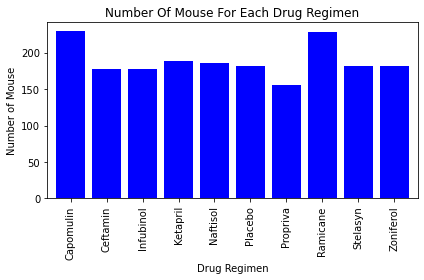

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_number = by_regimen_clean_df["Mouse ID"].count()
Mouse_by_regimen_chart = mice_number.plot(kind= "bar", facecolor="blue", width = 0.8, align = "center",title= "Number Of Mouse For Each Drug Regimen")
Mouse_by_regimen_chart.set_ylabel("Number of Mouse")
plt.tight_layout()
plt.show()

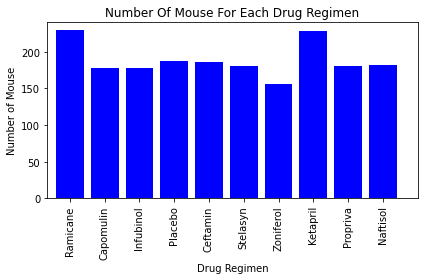

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(0,len(mice_number))
regimen = combined_df ["Drug Regimen"].drop_duplicates()
plt.bar(x_axis,mice_number,align="center",color="b", alpha =1)
plt.xticks(x_axis, regimen, rotation = "vertical")
plt.title("Number Of Mouse For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")
plt.xlim(-0.65, len(x_axis))
plt.ylim(0, max(mice_number)+10)
plt.tight_layout()
plt.show()


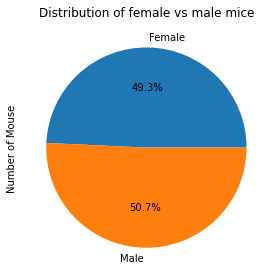

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
byregimen_clean_df = cleaned_df.groupby(["Sex"])
mice_number = byregimen_clean_df["Mouse ID"].count()
sex_distribution_pie = mice_number.plot(kind= "pie", figsize=(7,4), title= "Distribution of female vs male mice", autopct="%1.1f%%" )
sex_distribution_pie.set_ylabel("Number of Mouse")
plt.tight_layout()

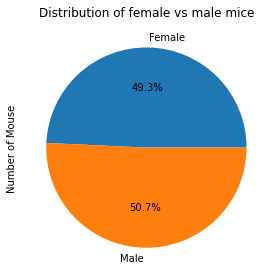

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_number,labels=["Female","Male"],autopct="%1.1f%%")
plt.title("Distribution of female vs male mice")
plt.ylabel("Number of Mouse")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [67]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
